(3, 256, 256, 3)


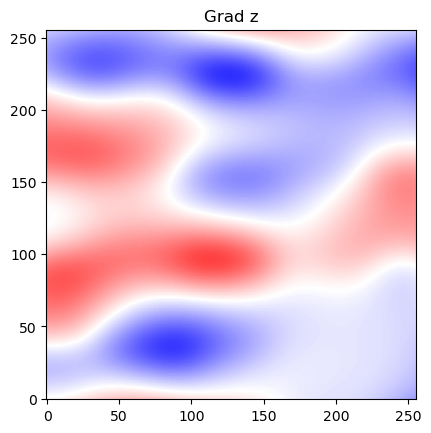

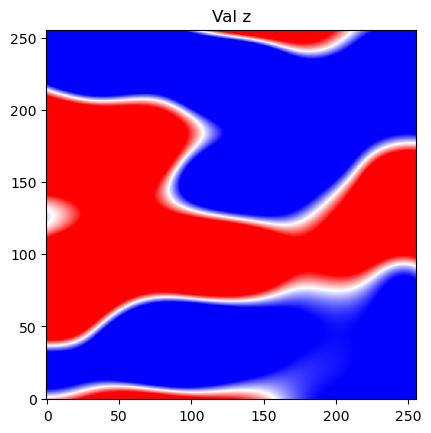

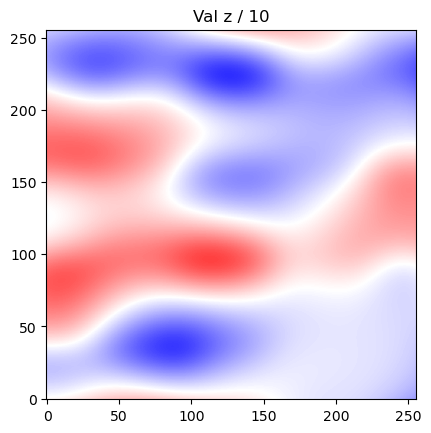

In [7]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as col


datapath = os.path.abspath('') + '/data/magfield_256_large.h5'
with h5py.File(datapath, mode='r') as db:
    f = db['field'][0]
    print(f.shape)
    Hx_x = np.gradient(f[0], axis=1)[:,:,1]
    Hz_z = np.gradient(f[2], axis=2)[:,:,1]
    Hx_z = np.gradient(f[0], axis=2)[:,:,1]
    Hy_z = np.gradient(f[1], axis=2)[:,:,1]

    f *= 10
    val_Hz_z = np.gradient(f[2], axis=2)[:,:,1]
    val_Hx_z = np.gradient(f[0], axis=2)[:,:,1]
    val_Hy_z = np.gradient(f[1], axis=2)[:,:,1]

    # print(Hz_z == val_Hz_z)
    # print(Hx_z == val_Hx_z)
    # print(Hy_z == val_Hy_z)
    # print(len(Hz_z.shape))

    # print('------Grad z------')
    # print(Hz_z.shape)
    # print(Hz_z.max())
    # print(Hz_z.min())

    # print('------Grad x------')
    # print(Hx_x.max())
    # print(Hx_x.min())
    c_norm = col.Normalize(vmin=-Hz_z.max(), vmax=Hz_z.max())

    plt.clf()
    ax = plt.gca()
    ax.imshow(Hy_z, cmap='bwr', norm=c_norm, origin="lower")
    plt.title('Grad z')
    plt.show()

    plt.clf()
    ax = plt.gca()
    ax.imshow(val_Hy_z, cmap='bwr', norm=c_norm, origin="lower")
    plt.title('Val z')
    plt.show()

    plt.clf()
    ax = plt.gca()
    ax.imshow(val_Hy_z/10, cmap='bwr', norm=c_norm, origin="lower")
    plt.title('Val z / 10')
    plt.show()


In [6]:
# Train dataset - statistics
with h5py.File(datapath, mode='r') as db:
    f = db['field'][:]
    print(f.shape)
    print(f'Mean: {f.mean()}')
    print(f'Std: {f.std()}')
    print(f.mean(axis=(0,2,3,4)))
    print(f.std(axis=(0,2,3,4)))

(5000, 3, 256, 256, 3)
Mean: 0.0007623230922035873
Std: 0.1126532033085823
[-0.00936944 -0.0011051   0.01276139]
[0.09885914 0.09635659 0.13698195]
